# Red Wine Quality Prediction Dataset


In [473]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [474]:
#loading data file
wine_ds=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

#display top of dataset
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [475]:
wine_ds.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [476]:
wine_ds.shape

(1599, 12)

In [477]:
#Data types
wine_ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [478]:
wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [479]:
#Checking for total missing values
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [480]:
wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

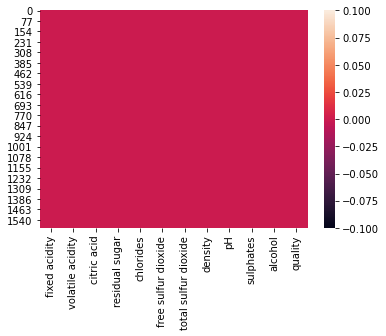

In [481]:
#visualization of null value using heat map
sns.heatmap(wine_ds.isnull())

In [482]:
# Checking for correlation of label with other attributes
corr_matrix=wine_ds.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


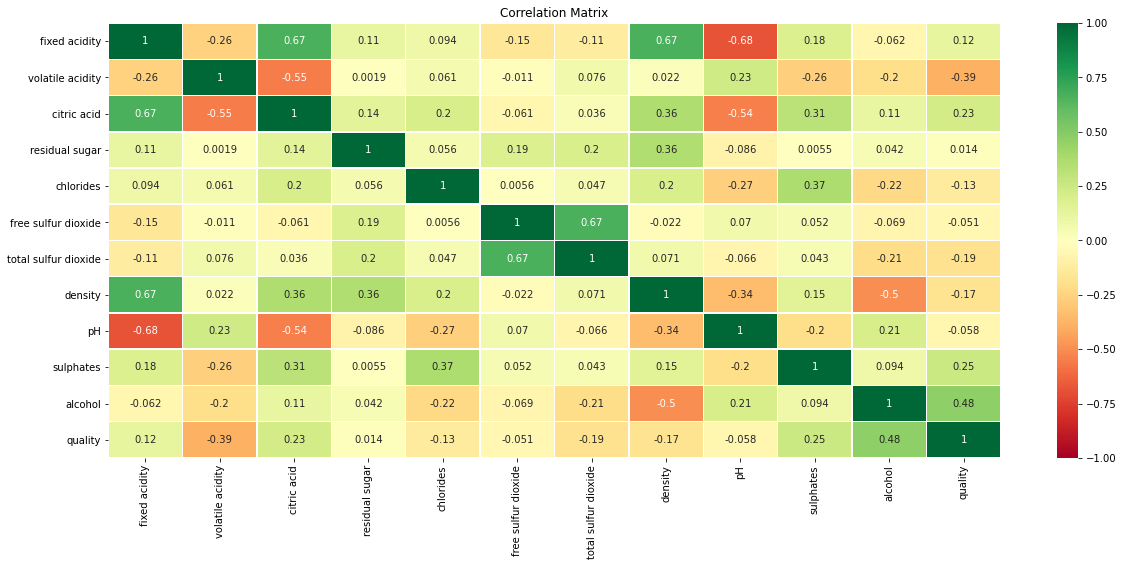

In [483]:
#visualization of correlation matrix
plt.figure(figsize=[20,8])
sns.heatmap(corr_matrix,vmin=-1,vmax=1,linewidths=.5,annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [484]:
#value counts for label attribute to see class imbalancing
wine_ds['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

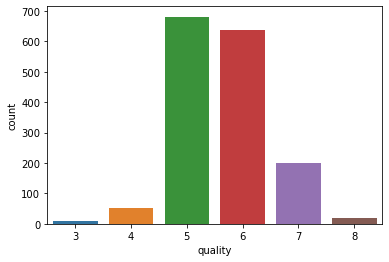

In [485]:
#Visualization of count plot
sns.countplot(wine_ds['quality'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
   

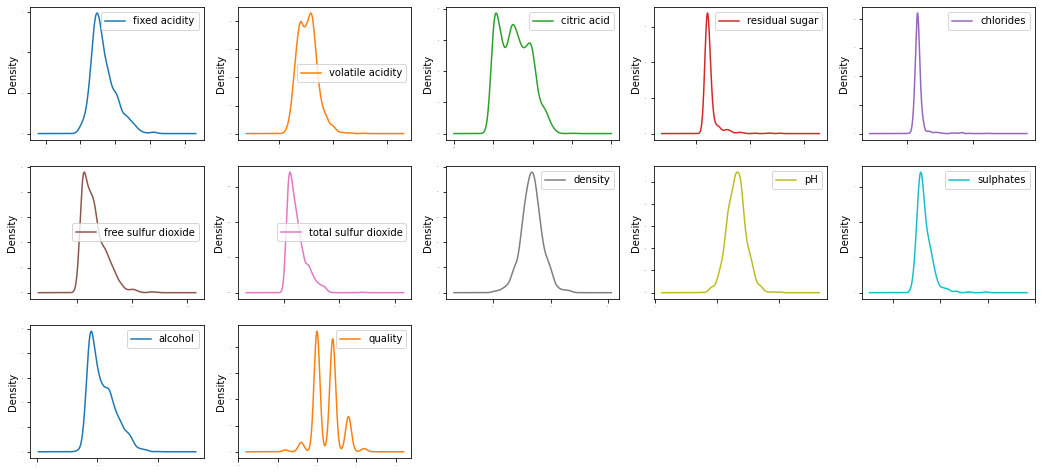

In [486]:
### Exploratory Data Analysis
## Distribution plot
wine_ds.plot(kind='density',subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(18,20))

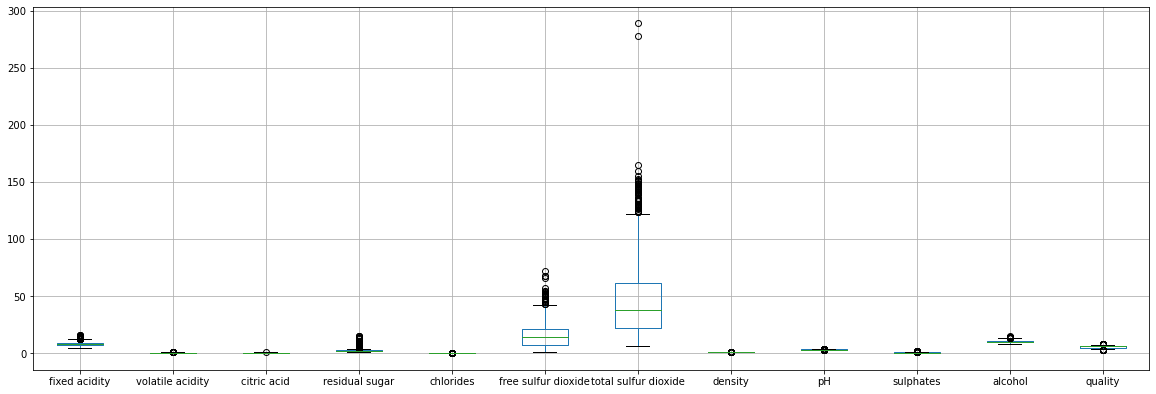

In [487]:
#Checking for outliers using boxplot
wine_ds.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:title={'center':'Comparison between pH and volatile acidity'}, xlabel='pH', ylabel='volatile acidity'>

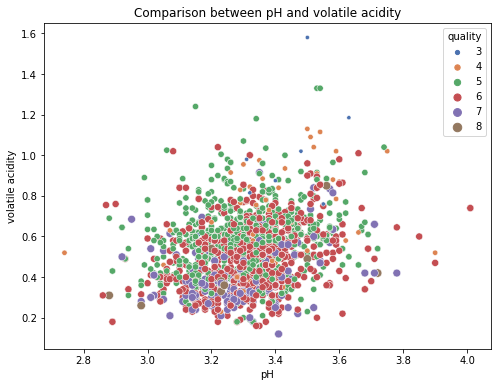

In [488]:
#Visulaization using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparison between pH and volatile acidity')
sns.scatterplot(wine_ds['pH'],wine_ds['volatile acidity'],hue=wine_ds['quality'],palette="deep", size=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between fixed acidity and volatile acidity'}, xlabel='fixed acidity', ylabel='volatile acidity'>

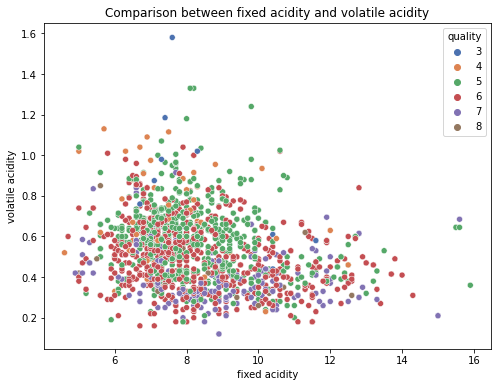

In [489]:
plt.figure(figsize=[8,6])
plt.title('Comparison between fixed acidity and volatile acidity')
sns.scatterplot(wine_ds['fixed acidity'],wine_ds['volatile acidity'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between pH and quality'}, xlabel='pH', ylabel='quality'>

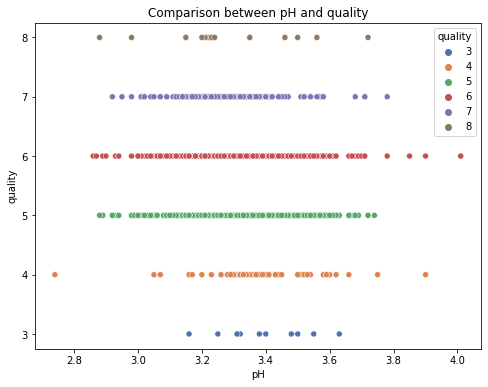

In [490]:
plt.figure(figsize=[8,6])
plt.title('Comparison between pH and quality')
sns.scatterplot(wine_ds['pH'],wine_ds['quality'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between fixed acidity and citric acid'}, xlabel='fixed acidity', ylabel='citric acid'>

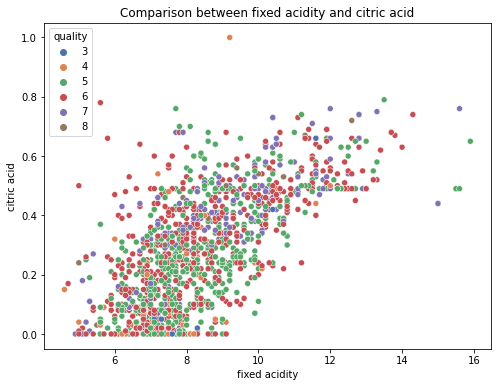

In [491]:
plt.figure(figsize=[8,6])
plt.title('Comparison between fixed acidity and citric acid')
sns.scatterplot(wine_ds['fixed acidity'],wine_ds['citric acid'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between residual sugar and chlorides'}, xlabel='residual sugar', ylabel='chlorides'>

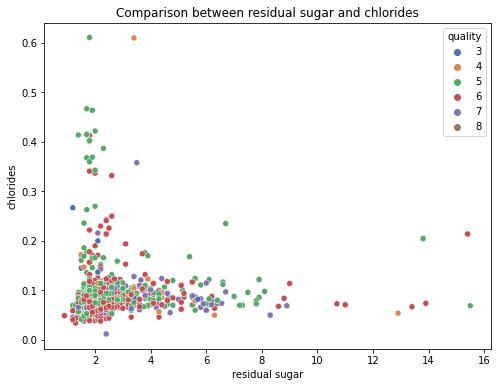

In [492]:
plt.figure(figsize=[8,6])
plt.title('Comparison between residual sugar and chlorides')
sns.scatterplot(wine_ds['residual sugar'],wine_ds['chlorides'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between residual sugar and citric acid'}, xlabel='residual sugar', ylabel='citric acid'>

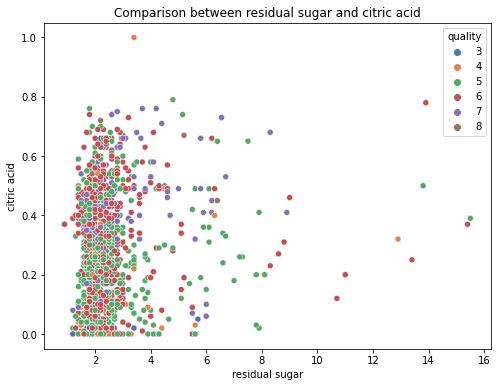

In [493]:
plt.figure(figsize=[8,6])
plt.title('Comparison between residual sugar and citric acid')
sns.scatterplot(wine_ds['residual sugar'],wine_ds['citric acid'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between free sulfur dioxide and total sulfur dioxide'}, xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

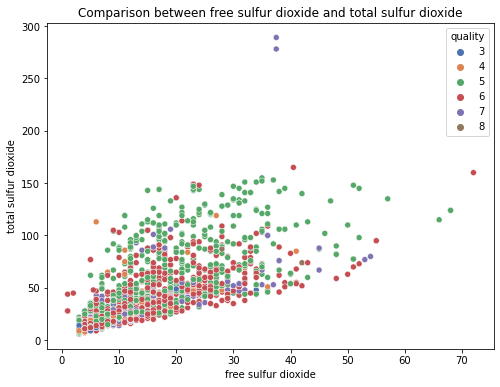

In [494]:
plt.figure(figsize=[8,6])
plt.title('Comparison between free sulfur dioxide and total sulfur dioxide')
sns.scatterplot(wine_ds['free sulfur dioxide'],wine_ds['total sulfur dioxide'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between density and total sulfur dioxide'}, xlabel='density', ylabel='total sulfur dioxide'>

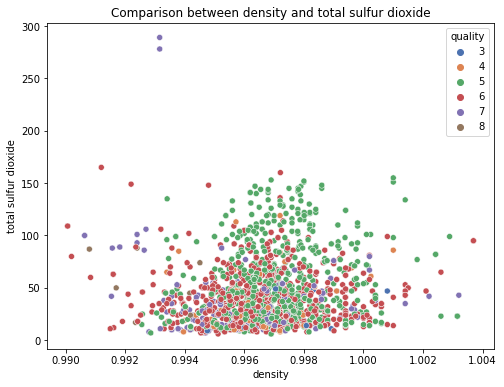

In [495]:
plt.figure(figsize=[8,6])
plt.title('Comparison between density and total sulfur dioxide')
sns.scatterplot(wine_ds['density'],wine_ds['total sulfur dioxide'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between density and pH'}, xlabel='density', ylabel='pH'>

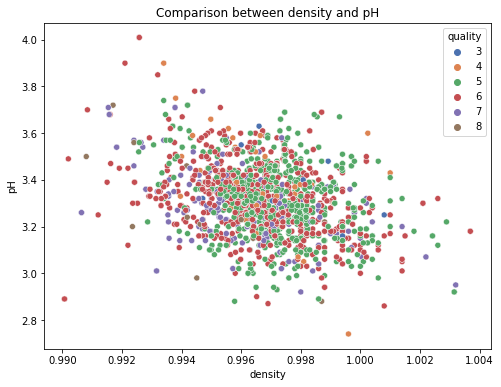

In [496]:
plt.figure(figsize=[8,6])
plt.title('Comparison between density and pH')
sns.scatterplot(wine_ds['density'],wine_ds['pH'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between density and sulphates'}, xlabel='density', ylabel='sulphates'>

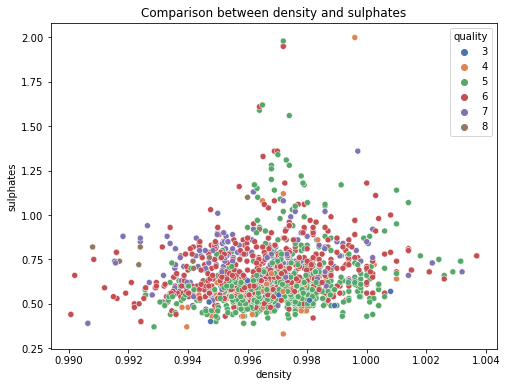

In [497]:
plt.figure(figsize=[8,6])
plt.title('Comparison between density and sulphates')
sns.scatterplot(wine_ds['density'],wine_ds['sulphates'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between alcohol and sulphates'}, xlabel='alcohol', ylabel='sulphates'>

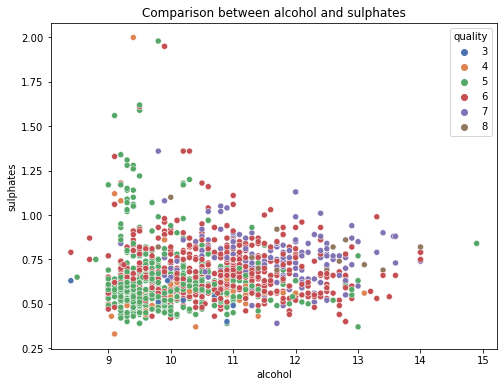

In [498]:
plt.figure(figsize=[8,6])
plt.title('Comparison between alcohol and sulphates')
sns.scatterplot(wine_ds['alcohol'],wine_ds['sulphates'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between total sulfur dioxide and sulphates'}, xlabel='total sulfur dioxide', ylabel='sulphates'>

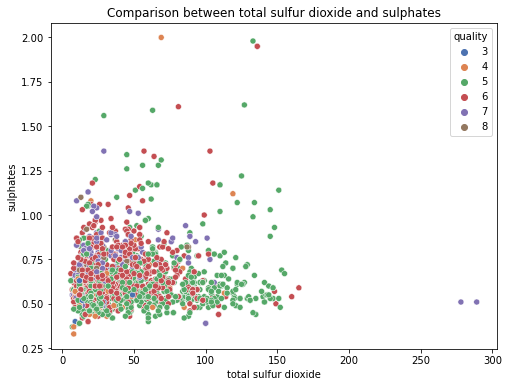

In [499]:
plt.figure(figsize=[8,6])
plt.title('Comparison between total sulfur dioxide and sulphates')
sns.scatterplot(wine_ds['total sulfur dioxide'],wine_ds['sulphates'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between chlorides and alcohol'}, xlabel='chlorides', ylabel='alcohol'>

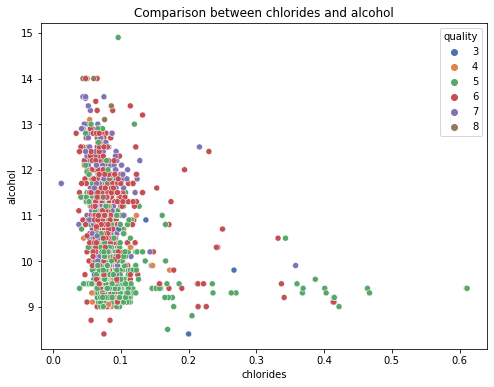

In [500]:
plt.figure(figsize=[8,6])
plt.title('Comparison between chlorides and alcohol')
sns.scatterplot(wine_ds['chlorides'],wine_ds['alcohol'],palette="deep",hue=wine_ds['quality'])

<AxesSubplot:title={'center':'Comparison between volatile acidity and alcohol'}, xlabel='volatile acidity', ylabel='alcohol'>

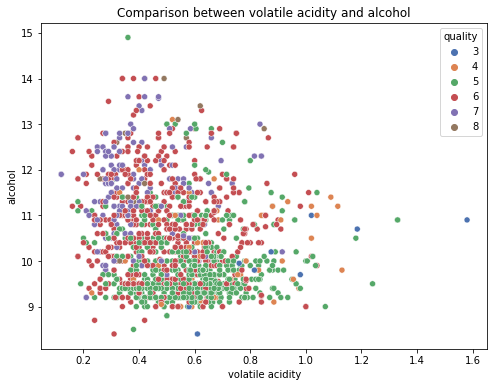

In [501]:
plt.figure(figsize=[8,6])
plt.title('Comparison between volatile acidity and alcohol')
sns.scatterplot(wine_ds['volatile acidity'],wine_ds['alcohol'],palette="deep",hue=wine_ds['quality'])

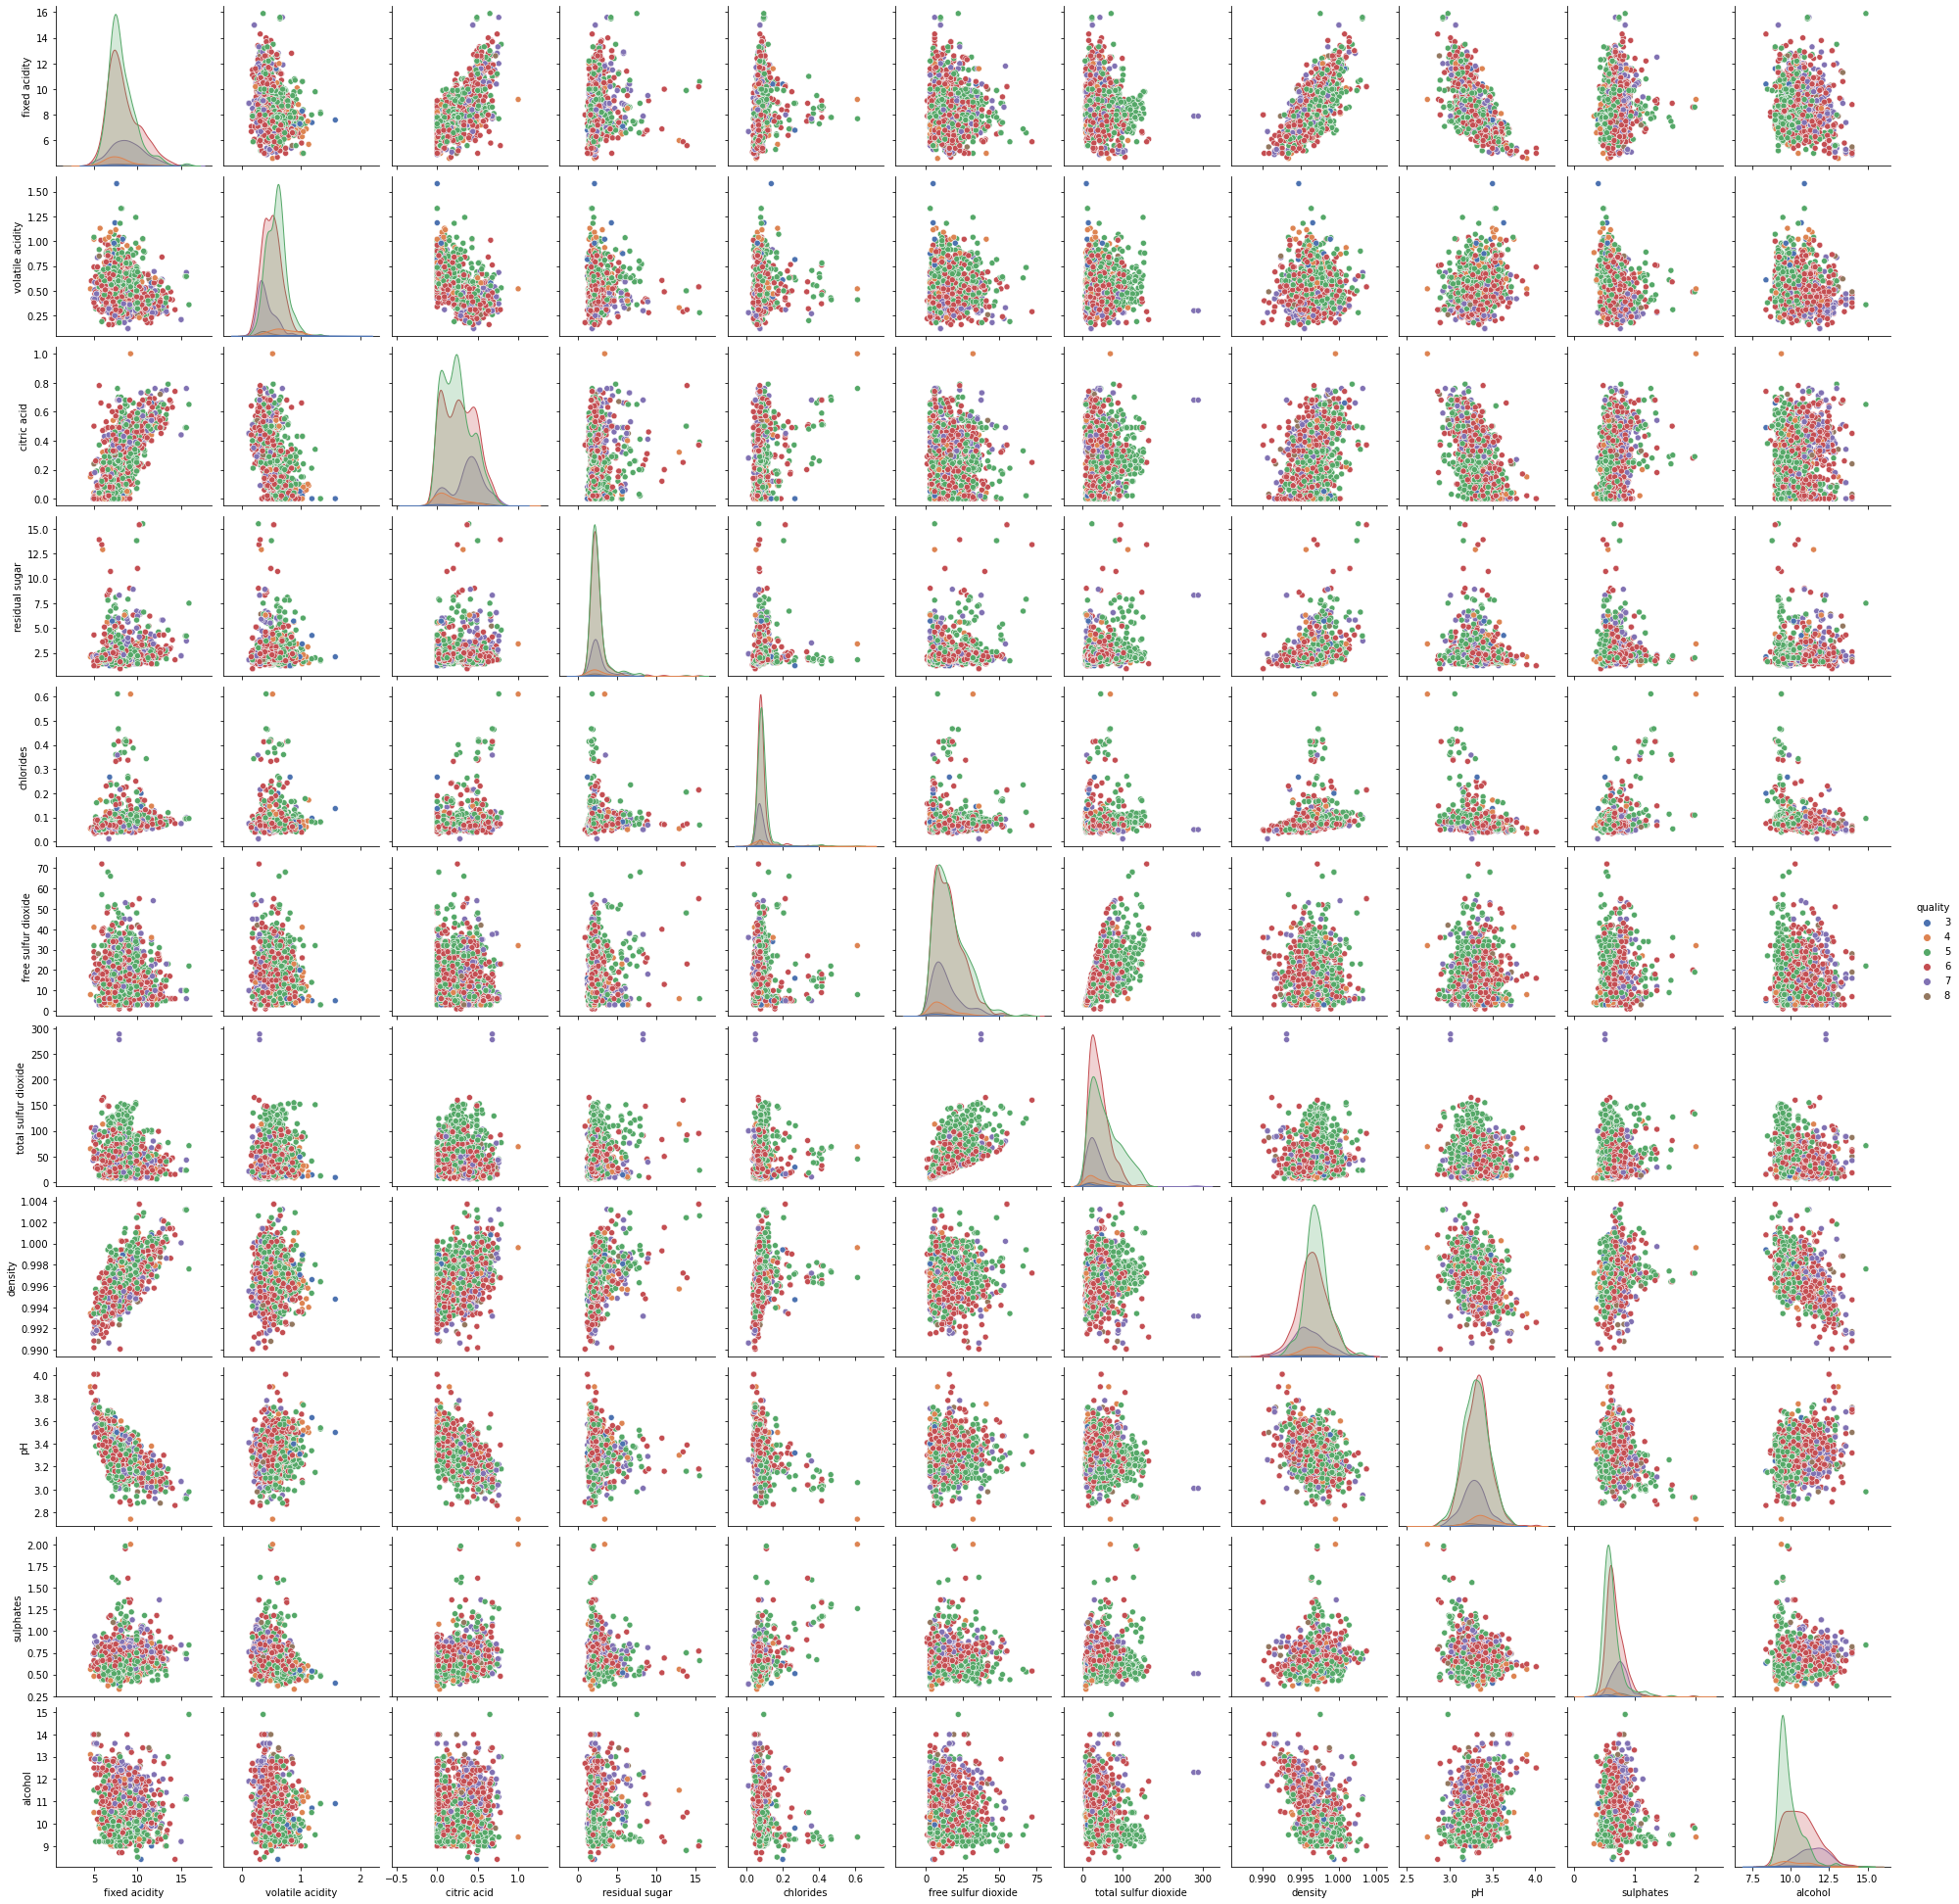

In [502]:
#visualization of multivariate analysis
sns.pairplot(wine_ds,hue='quality', palette="deep")

In [503]:
#Add a new feature according to mean of the quality
#Good wine represented by 2, average 1, and bad wine represented by 0
wine_ds['value'] = ""
wine_ds['value'] = [1 if each >= 7 else 0 for each in wine_ds['quality']]

print("Good Wine Class:",wine_ds[wine_ds['value'] == 1].shape)
print("Bad Wine Class:",wine_ds[wine_ds['value'] == 0].shape)

Good Wine Class: (217, 13)
Bad Wine Class: (1382, 13)


In [507]:
wine_ds['quality'].replace([3,4,5,6],0,inplace=True)
wine_ds['quality'].replace([8,7],1,inplace=True)
wine_ds['quality'].unique()

array([0, 1], dtype=int64)

In [508]:
### Data Cleaning 

## Removing outliers

#Importing zscore from scipy.stats

from scipy.stats import zscore

z=np.abs(zscore(wine_ds))

new_wine_ds=wine_ds[(z<3).all(axis=1)] # Threshold value is +/-3

print('Shape of new data set after removing outliers:',new_wine_ds.shape)
print('Shape of data set with outliers:',wine_ds.shape)

Shape of new data set after removing outliers: (1458, 13)
Shape of data set with outliers: (1599, 13)


In [510]:
##Calculating data loss

D_t=((1599-1458)/1599)*100
print('Data loss after removing outliers is :',D_t,'%')

Data loss after removing outliers is : 8.818011257035648 %


In [511]:
#Spliiting instances and target variable

x= new_wine_ds.drop('quality',axis=1)
y=new_wine_ds['quality']

In [512]:
##Checking skweness 
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
value                   2.103030
dtype: float64

In [513]:
## removing skewness for fixed acidity attribute using log tranformation

new_wine_ds['fixed acidity']=np.log(new_wine_ds['fixed acidity'])
new_wine_ds['fixed acidity'].skew()

0.3770999202003907

In [514]:
## removing skewness for residual sugar attribute using cbrt tranformation

new_wine_ds['residual sugar']=np.log(new_wine_ds['residual sugar'])
new_wine_ds['residual sugar'].skew()

1.2290702307516947

In [515]:
## removing skewness for free sulfur dioxide attribute using log tranformation

new_wine_ds['free sulfur dioxide']=np.log(new_wine_ds['free sulfur dioxide'])
new_wine_ds['free sulfur dioxide'].skew()

-0.3002638053291528

In [516]:
## removing skewness for total sulfur dioxide attribute using log tranformation

new_wine_ds['total sulfur dioxide']=np.log(new_wine_ds['total sulfur dioxide'])
new_wine_ds['total sulfur dioxide'].skew()

-0.09573465761573655

In [517]:
## removing skewness for sulphates attribute using log tranformation

new_wine_ds['sulphates']=np.log(new_wine_ds['sulphates'])
new_wine_ds['sulphates'].skew()

0.3453437103203422

In [518]:
## removing skewness for alcohol attribute using log tranformation

new_wine_ds['alcohol']=np.log(new_wine_ds['alcohol'])
new_wine_ds['alcohol'].skew()

0.5888351186223483

In [519]:
## removing skewness for chlorides attribute using log tranformation

new_wine_ds['chlorides']=np.log(new_wine_ds['chlorides'])
new_wine_ds['chlorides'].skew()

0.5288280861916301

In [520]:
##new dataset after removing skewness
new_wine_ds.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.588835
quality                 2.103030
value                   2.103030
dtype: float64

In [521]:
new_wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
value                   0
dtype: int64

In [522]:
x.shape

(1458, 12)

In [523]:
y.shape

(1458,)

In [524]:
##Balancing the quality variable using SMOTE

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [525]:
y_over.value_counts()

1    1257
0    1257
Name: quality, dtype: int64

In [526]:
x_over.shape

(2514, 12)

In [527]:
y_over.shape

(2514,)

In [528]:
#Creating train-test split

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn import metrics

In [529]:
###Feature Selection
##Feature Selection is a techinque of finding out the features that contribute the most to our model 
#i.e. the best predictors.


x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,random_state = 1)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (1885, 12) (1885,)
Testing set shape:  (629, 12) (629,)


In [530]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [531]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

Score:  [1.50330251e+01 1.57105198e+01 2.12829032e+01 4.51889572e+00
 4.15617457e-01 1.88477112e+02 2.62765128e+03 3.30542349e-04
 1.29158575e-01 1.12729697e+01 6.78670843e+01 9.46000000e+02]
Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'value'],
      dtype='object')


In [532]:
ft = SelectKBest(f_classif, k= 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

Score:  [ 45.97676163 343.7994542  199.14083495  13.49140717  81.01250346
  34.44340088 157.94907726 107.89569038  23.82048903 586.39135216
 928.25527483          inf]
Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'value'],
      dtype='object')


In [533]:
#importing libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [534]:
#DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)

# Summary of the predictions made by the classifier

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for DecisionTreeClassifier is :',accuracy_score(y_test,pred))

[[311   0]
 [  0 318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

Accuracy score for DecisionTreeClassifier is : 1.0


In [535]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)

# Summary of the predictions made by the classifier

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for Random Forest Classifier is :',accuracy_score(y_test,pred))

[[311   0]
 [  0 318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

Accuracy score for Random Forest Classifier is : 1.0


In [536]:
#GaussianNB


NB=GaussianNB()
NB.fit(x_train,y_train)
pred=NB.predict(x_test)


# Summary of the predictions made by the classifier

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Accuracy score
print('Accuracy score for GaussianNB is :',accuracy_score(y_test,pred))

[[311   0]
 [  0 318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

Accuracy score for GaussianNB is : 1.0


In [537]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('Accuracy score for k-Nearest Neighbor is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       311
           1       0.94      0.99      0.97       318

    accuracy                           0.97       629
   macro avg       0.97      0.96      0.96       629
weighted avg       0.97      0.97      0.96       629

[[292  19]
 [  3 315]]
Accuracy score for k-Nearest Neighbor is : 0.9650238473767886


In [538]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

ETC= ExtraTreeClassifier()

ETC.fit(x_train, y_train)

y_pred = ETC.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

[[311   0]
 [  0 318]]
accuracy is 1.0


In [539]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier

Bag = BaggingClassifier()
Bag.fit(x_train, y_train)

pred = Bag.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred))
print('The confusion matrix :',confusion_matrix(y_test, pred))

# Accuracy score
print('Accuracy score for BaggingClassifier is :',accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

The confusion matrix : [[311   0]
 [  0 318]]
Accuracy score for BaggingClassifier is : 1.0


In [540]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)

pred = GB.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred))
print('The confusion matrix :',confusion_matrix(y_test, pred))

# Accuracy score
print('Accuracy score for GradientBoostingClassifier is :',accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

The confusion matrix : [[311   0]
 [  0 318]]
Accuracy score for GradientBoostingClassifier is : 1.0


In [541]:
#importing cross val library
from sklearn.model_selection import cross_val_score

In [542]:
print('cross_val_score for DecisionTreeClassifier:',cross_val_score(DTC,x_over,y_over,cv=5).mean())
print('cross_val_score for RandomForestClassifier:',cross_val_score(RFC,x_over,y_over,cv=5).mean())
print('cross_val_score for GausiaanNB:',cross_val_score(NB,x_over,y_over,cv=5).mean())
print('cross_val_score for k-Nearest Neighbor:',cross_val_score(KNN,x_over,y_over,cv=5).mean())
print('cross_val_score for ExtraTreeClassifier:',cross_val_score(ETC,x_over,y_over,cv=5).mean())
print('cross_val_score for BaggingClassifier:',cross_val_score(Bag,x_over,y_over,cv=5).mean())
print('cross_val_score for GradientBoostingClassifier:',cross_val_score(GB,x_over,y_over,cv=5).mean())

cross_val_score for DecisionTreeClassifier: 1.0
cross_val_score for RandomForestClassifier: 1.0
cross_val_score for GausiaanNB: 1.0
cross_val_score for k-Nearest Neighbor: 0.9315810317378597
cross_val_score for ExtraTreeClassifier: 0.9801177001734611
cross_val_score for BaggingClassifier: 1.0
cross_val_score for GradientBoostingClassifier: 1.0


In [543]:
#Finding out best model:

#Accuracy score is substracted from cross_val_score

DTC= 1-1
print('DTC :',DTC)

RFC= 1-1
print('RFC :',RFC)

NB= 1-1
print('NB :',NB)


KNN= 0.96-0.93
print('KNN:',KNN)

ETC= 1-0.98
print('ETC :',ETC)

Bag= 1-1
print('Bag :',Bag)

GB= 1-1
print('GB :',GB)

DTC : 0
RFC : 0
NB : 0
KNN: 0.029999999999999916
ETC : 0.020000000000000018
Bag : 0
GB : 0


In [544]:
## Checking for training time of each model

# Create Decision Tree classifier object
import time 
DTC = DecisionTreeClassifier() 
# Train Decision Tree Classifier 
start = time.time() 
DTC = DTC.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for DTC: {stop - start}s")

Training time for DTC: 0.021986961364746094s


In [545]:
# Create Random Forest classifier object

RFC = RandomForestClassifier() 
# Train Decision Tree Classifier 
start = time.time() 
RFC = RFC.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for RFC: {stop - start}s")

Training time for RFC: 1.1033704280853271s


In [546]:
NB=GaussianNB()

# Train Gaussian NB 
start = time.time() 
NB = NB.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for NB: {stop - start}s")

Training time for NB: 0.01598358154296875s


In [547]:
KNN= KNeighborsClassifier(n_neighbors=1)

# Train k-nearest neighbor Classifier 
start = time.time() 
KNN = KNN.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for KNN: {stop - start}s")

Training time for KNN: 0.031981706619262695s


In [548]:
ETC= ExtraTreeClassifier()

# Train Extra Tree Classifier 
start = time.time() 
ETC = ETC.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for ETC: {stop - start}s")

Training time for ETC: 0.011993885040283203s


In [549]:
Bag = BaggingClassifier()

# Train Bagging  Classifier 
start = time.time() 
Bag = Bag.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for Bag: {stop - start}s")

Training time for Bag: 0.15490984916687012s


In [550]:
GB = GradientBoostingClassifier()

# Train Gradient Boosting  Classifier 
start = time.time() 

GB = GB.fit(x_train,y_train) 
stop = time.time() 
print(f"Training time for GB: {stop - start}s")

Training time for GB: 1.4691884517669678s


In [553]:
### Improving accuracy of K-Nearest Neighbor using hyper parameter tuning

##importing library
from sklearn.model_selection import GridSearchCV


grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'leaf_size' : range(1,10),
              'p': [1,2]}

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
GCV = GridSearchCV(knn_2, grid_params, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x_over,y_over)


In [554]:
#checking for best parameters
GCV.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [567]:
### Improving accuracy of Extra Tree Classifier using hyper parameter tuning

#Create new ETC object
etc_2 = ExtraTreeClassifier()

param_grid={
        #'n_estimators': range(50,126,25),
        'max_features': range(1,50),
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5),
    },

#Use GridSearch
GCV = GridSearchCV(etc_2,param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x_over,y_over)

#checking for best parameters
GCV.best_params_


{'max_features': 6}

In [568]:
#Creating Final Model after hyperparameter tuning for KNN

f_mod_KNN= KNeighborsClassifier(n_neighbors=1,leaf_size=1,p=1,metric='minkowski',weights='distance')
f_mod_KNN.fit(x_train, y_train)

y_pred = f_mod_KNN.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for k-Nearest Neighbor is :',accuracy_score(y_pred,y_test))

scores = cross_val_score(f_mod_KNN, x_over, y_over, cv =5)



print('Model accuracy: ',np.mean(scores))



              precision    recall  f1-score   support

           0       0.99      0.96      0.98       311
           1       0.96      0.99      0.98       318

    accuracy                           0.98       629
   macro avg       0.98      0.98      0.98       629
weighted avg       0.98      0.98      0.98       629

[[299  12]
 [  2 316]]
Accuracy score for k-Nearest Neighbor is : 0.9777424483306836
Model accuracy:  0.9554513556113517


In [569]:
#Creating Final Model after hyperparameter tuning for ExtraTreeClassifier

f_mod_ETC= ExtraTreeClassifier(max_features=6)
f_mod_ETC.fit(x_train, y_train)

y_pred = f_mod_ETC.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for ExtraTreeClassifier is :',accuracy_score(y_pred,y_test))

scores = cross_val_score(f_mod_ETC, x_over, y_over, cv =5)



print('Model accuracy: ',np.mean(scores))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

[[311   0]
 [  0 318]]
Accuracy score for ExtraTreeClassifier is : 1.0
Model accuracy:  0.9976143141153081


In [572]:
###visualizing the performance of the multi-class classification problem 

##using AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

#importing library to visualize auc-roc score and roc curve.

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [577]:
y_prob=f_mod_ETC.predict_proba(x_test)[:,1]   # This will give positive class prediction probabilities 

In [578]:
pred=f_mod_ETC.predict(x_test)
print(pred)

[0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 

In [579]:
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

In [581]:
f_mod_ETC.score(x_test, y_pred)

1.0

In [582]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [583]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [584]:
fpr  #False Positive Rate

array([0., 0., 1.])

In [585]:
tpr    # True Positive Rate

array([0., 1., 1.])

In [586]:
thresholds

array([2., 1., 0.])

In [587]:
roc_auc = auc(fpr, tpr)
roc_auc

1.0

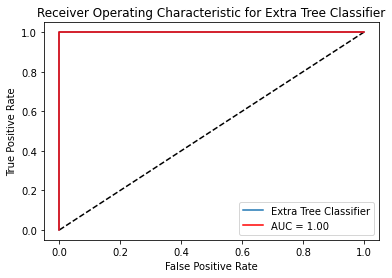

In [588]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for Extra Tree Classifier')
plt.show()

In [589]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_KNN,'wine_quality_knn.obj')

['wine_quality_knn.obj']